In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd

def load_data():

    data_df = pd.read_excel('/content/drive/My Drive/dataset/dataset.xlsx', engine='openpyxl')

    data_df.head(100000).to_csv('output_reviews_top.csv')

load_data()

In [6]:
top_data_df = pd.read_csv('output_reviews_top.csv')
print("Columns in the original dataset:\n")
print(top_data_df.columns)

Columns in the original dataset:

Index(['Unnamed: 0', 'URL', 'Text', 'Sentiment'], dtype='object')


Number of rows per star rating:
NEG    1000
POS     999
Name: Sentiment, dtype: int64


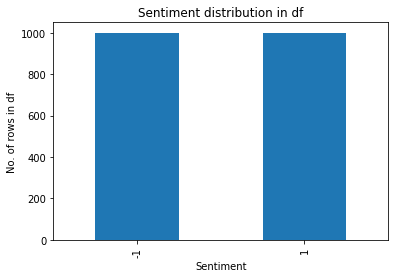

In [8]:
import matplotlib.pyplot as plt 

print("Number of rows per star rating:")
print(top_data_df['Sentiment'].value_counts())

# Function to map stars to sentiment
def map_sentiment(sentiment):
    if sentiment == 'NEG':
        return -1
    else:
        return 1
# Mapping stars to sentiment into three categories
top_data_df['Sentiment_value'] = [map_sentiment(x) for x in top_data_df['Sentiment']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(top_data_df['Sentiment_value']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [10]:
# Function to retrieve top few number of each category
def get_top_data(top_n):
    top_data_df_positive = top_data_df[top_data_df['Sentiment_value'] == 1].head(top_n)
    top_data_df_negative = top_data_df[top_data_df['Sentiment_value'] == -1].head(top_n)
    top_data_df_small = pd.concat([top_data_df_positive, top_data_df_negative])
    return top_data_df_small

# Function call to get the top 10000 from each sentiment
top_data_df_small = get_top_data(999)

# After selecting top few samples of each sentiment
print("After segregating and taking equal number of rows for each sentiment:")
print(top_data_df_small['Sentiment_value'].value_counts())
top_data_df_small.head(10)

After segregating and taking equal number of rows for each sentiment:
 1    999
-1    999
Name: Sentiment_value, dtype: int64


,Unnamed: 0,URL,Text,Sentiment,Sentiment_value
0,0,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS,1
1,1,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS,1
2,2,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS,1
3,3,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS,1
4,4,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS,1
5,5,http://www.imdb.com/title/tt0347779/usercomments,A very good adaptation of the novel by amrita ...,POS,1
6,6,http://www.imdb.com/title/tt0095655/usercomments,"Ah, Moonwalker, I'm a huge Michael Jackson fan...",POS,1
7,7,http://www.imdb.com/title/tt0298131/usercomments,Although the beginning of the movie in New Yor...,POS,1
8,8,http://www.imdb.com/title/tt0088915/usercomments,"As many reviewers here have noted, the film ve...",POS,1
9,9,http://www.imdb.com/title/tt0828154/usercomments,"Bear in mind, any film (let alone documentary)...",POS,1


In [13]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
top_data_df_small['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in top_data_df_small['Text']] 
print(top_data_df_small['tokenized_text'].head(10))

0    [girlfight, follows, project, dwelling, new, y...
1    [hollywood, north, is, an, euphemism, from, th...
2    [that, show, is, definitely, the, funniest, sh...
3    [minutes, of, pure, holiday, terror, okay, so,...
4    [series, of, random, seemingly, insignificant,...
5    [very, good, adaptation, of, the, novel, by, a...
6    [ah, moonwalker, huge, michael, jackson, fan, ...
7    [although, the, beginning, of, the, movie, in,...
8    [as, many, reviewers, here, have, noted, the, ...
9    [bear, in, mind, any, film, let, alone, docume...
Name: tokenized_text, dtype: object


In [14]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
top_data_df_small['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in top_data_df_small['tokenized_text'] ]
top_data_df_small['stemmed_tokens'].head(10)

0    [girlfight, follow, project, dwell, new, york,...
1    [hollywood, north, is, an, euphem, from, the, ...
2    [that, show, is, definit, the, funniest, show,...
3    [minut, of, pure, holidai, terror, okai, so, i...
4    [seri, of, random, seemingli, insignific, thef...
5    [veri, good, adapt, of, the, novel, by, amrita...
6    [ah, moonwalk, huge, michael, jackson, fan, gr...
7    [although, the, begin, of, the, movi, in, new,...
8    [as, mani, review, here, have, note, the, film...
9    [bear, in, mind, ani, film, let, alon, documen...
Name: stemmed_tokens, dtype: object

In [15]:
from gensim import corpora
# Build the dictionary
mydict = corpora.Dictionary(top_data_df_small['stemmed_tokens'])
print("Total unique words:")
print(len(mydict.token2id))
print("\nSample data from dictionary:")
i = 0
# Print top 4 (word, id) tuples
for key in mydict.token2id.keys():
    print("Word: {} - ID: {} ".format(key, mydict.token2id[key]))
    if i == 3:
        break
    i += 1

Total unique words:
17708

Sample data from dictionary:
Word: abl - ID: 0 
Word: about - ID: 1 
Word: all - ID: 2 
Word: almost - ID: 3 


In [16]:
import gensim
vocab_len = len(mydict)
print("Example of how the BOW words")
arr = []
for line in top_data_df_small['stemmed_tokens']:
    print("Doc2Bow Line:")
    print(mydict.doc2bow(line))
    for word in line:
        arr.append(mydict.token2id[word])
    print("Actual line:")
    print(line)
    print("(Word, count) Tuples:")
    print([(mydict[id], count) for id, count in mydict.doc2bow(line) ])
    print("Sparse bow vector for the line")
    print(gensim.matutils.corpus2csc([mydict.doc2bow(line)],num_terms=vocab_len).toarray()[:,0])
    break
print("Sorted word id list")
print(sorted(arr))

Example of how the BOW words
Doc2Bow Line:
[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 5), (8, 1), (9, 1), (10, 5), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 2), (18, 1), (19, 2), (20, 2), (21, 1), (22, 2), (23, 2), (24, 2), (25, 2), (26, 3), (27, 1), (28, 2), (29, 1), (30, 1), (31, 2), (32, 4), (33, 2), (34, 1), (35, 2), (36, 3), (37, 2), (38, 2), (39, 1), (40, 5), (41, 2), (42, 2), (43, 1), (44, 1), (45, 1), (46, 2), (47, 2), (48, 3), (49, 2), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 5), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 2), (64, 2), (65, 2), (66, 1)]
Actual line:
['girlfight', 'follow', 'project', 'dwell', 'new', 'york', 'high', 'school', 'girl', 'from', 'sens', 'of', 'futil', 'into', 'the', 'world', 'of', 'amateur', 'box', 'where', 'she', 'find', 'self', 'esteem', 'purpos', 'and', 'much', 'more', 'although', 'the', 'film', 'is', 'not', 'about', 'box', 'box', 'is', 'all', 'about', 'the', 'film', 'so', 'much

In [17]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['URL', 'Text', 'stemmed_tokens']], 
                                                        top_data_df_small['Sentiment_value'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(top_data_df_small)

Value counts for Train sentiments
 1    712
-1    686
Name: Sentiment_value, dtype: int64
Value counts for Test sentiments
-1    313
 1    287
Name: Sentiment_value, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index  ...                                     stemmed_tokens
0    642  ...  [thi, documentari, ha, been, air, on, both, rt...
1     60  ...  [thi, film, wa, the, first, british, teen, mov...
2   1605  ...  [would, have, left, the, movi, halfwai, throug...
3    998  ...  [gundam, wing, to, me, happen, to, be, good, a...
4   1239  ...  [without, question, the, worst, elvi, film, ev...

[5 rows x 4 columns]


In [19]:
import time
start_time = time.time()
vocab_len = len(mydict)
bow_filename = 'train_review_bow.csv'
with open(bow_filename, 'w+') as bow_file:
    for index, row in X_train.iterrows():
        features = gensim.matutils.corpus2csc([mydict.doc2bow(row['stemmed_tokens'])],num_terms=vocab_len).toarray()[:,0]
        if index == 0:
            print("Header")
            header = ",".join(str(mydict[ele]) for ele in range(vocab_len))
            print(header)
            bow_file.write(header)
            bow_file.write("\n")
        line1 = ",".join( [str(vector_element) for vector_element in features] )
        bow_file.write(line1)
        bow_file.write('\n')

print("Time taken to create bow for :" + str(time.time() - start_time))

Header
abl,about,all,almost,although,amateur,an,and,artist,be,box,can,chick,connect,don,drama,dwell,esteem,even,film,find,flick,follow,from,futil,girl,girlfight,good,high,honesti,human,into,is,it,know,more,much,new,no,not,of,project,purpos,rather,realiti,rocki,school,self,sens,she,shoot,smell,so,sweat,technic,the,to,veri,viewer,where,which,who,will,with,world,york,you,act,ar,around,arriv,as,at,author,bayt,becaus,been,bobbi,bogota,break,brian,broth,by,california,canada,canadian,capit,case,cheaper,citi,civil,cohes,cook,cost,deal,director,disast,do,documentari,econom,egotist,euphem,flight,gener,great,ha,happen,have,help,hilari,hollywood,in,industri,invad,iran,lantern,last,later,lead,like,lot,make,mani,michael,moon,movi,myer,needless,north,noth,novel,obsess,offer,on,origin,part,person,peter,present,probabl,process,produc,product,right,ryan,sai,sandi,save,saw,seem,shot,spoil,success,tax,that,thei,thi,too,toronto,transform,try,turn,ultim,vancouv,wai,went,what,written,ago,air,also,alwai,anoth

In [20]:
from sklearn.tree import DecisionTreeClassifier
bow_df = pd.read_csv('train_review_bow.csv')
# Train the classifier with default parameters
start_time = time.time()
# Initialize the classifier object
bow_clf = DecisionTreeClassifier(random_state=0)
# Fit the model with input vectors and corresponding sentiment labels
bow_clf.fit(bow_df, Y_train['Sentiment_value'])
print("Time taken to fit the model: " + str(time.time() - start_time))

Time taken to fit the model: 1.4001126289367676


In [21]:
# Find out the most important features from the bow classification model
importances = list(bow_clf.feature_importances_)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(bow_df.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
top_i = 0
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))
    if top_i == 20:
        break
    top_i += 1

Variable: bad                  Importance: 0.1669461871
Variable: wast                 Importance: 0.1254934397
Variable: excel                Importance: 0.0692289262
Variable: bore                 Importance: 0.054036118
Variable: poor                 Importance: 0.0532591927
Variable: ridicul              Importance: 0.0360510426
Variable: film                 Importance: 0.023788887
Variable: charact              Importance: 0.0231885279
Variable: worst                Importance: 0.0224430566
Variable: poorli               Importance: 0.0201562152
Variable: neither              Importance: 0.018965248
Variable: person               Importance: 0.018254452
Variable: black                Importance: 0.0173945218
Variable: idiot                Importance: 0.0165003857
Variable: pathet               Importance: 0.0164166877
Variable: terribl              Importance: 0.01604762
Variable: perfect              Importance: 0.0147043636
Variable: badli                Importance: 0.014507065

In [23]:
from sklearn.metrics import classification_report
# Iterating through test data to get the predictions of sentiment by the model
test_features = []
start_time = time.time()
for index, row in X_test.iterrows():
    # Converting the tokens into the formet that the model requires
    features = gensim.matutils.corpus2csc([mydict.doc2bow(row['stemmed_tokens'])],num_terms=vocab_len).toarray()[:,0]
    test_features.append(features)
test_predictions = bow_clf.predict(test_features)
# Comparing the predictions to actual sentiments for the sentences
print(classification_report(Y_test['Sentiment_value'],test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

              precision    recall  f1-score   support

          -1       0.89      0.90      0.90       313
           1       0.89      0.87      0.88       287

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

Time taken to predict the model 0.44167089462280273
